# Mall Customer Segmentation with KMeans

This project demonstrates how **unsupervised machine learning (clustering)** can be used to understand customer behavior in a retail/mall setting.  

### Problem Statement
You own a shopping mall and want to better understand your customers.  
- Who are your **high-value customers (VIPs)**?  
- Which groups are **price-sensitive**?  
- Which ones are **low priority** for marketing?  

By segmenting customers, the marketing team can design **targeted strategies** for each group, increasing efficiency and revenue.

---

### Goals of the Project
1. Perform **Exploratory Data Analysis (EDA)** to understand customer demographics.  
2. Use the **Elbow Method** to determine the optimal number of clusters.  
3. Apply **KMeans clustering** to segment customers.  
4. Visualize results in **2D and 3D scatter plots**.  
5. Provide **business insights** and strategies based on customer segments.  

---

### Outcome
By the end of this project, we will have identified **5 meaningful customer groups**, each with distinct income and spending patterns. These insights can help mall management make **data-driven marketing decisions**.


## Module Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load And Analyze The Dataset

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Exploratory Data Analysis

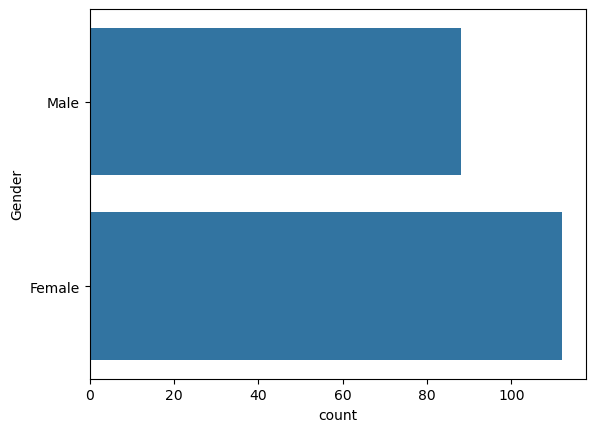

In [5]:
sns.countplot(df['Gender'])
plt.show()

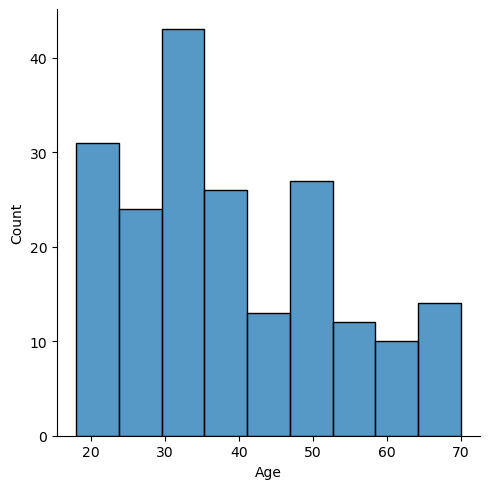

In [6]:
sns.displot(df['Age'])
plt.show()

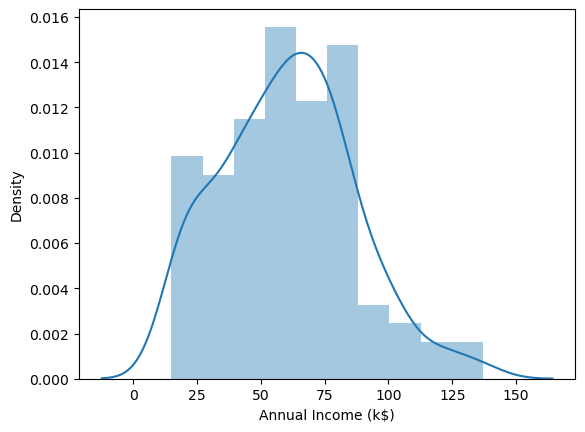

In [7]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

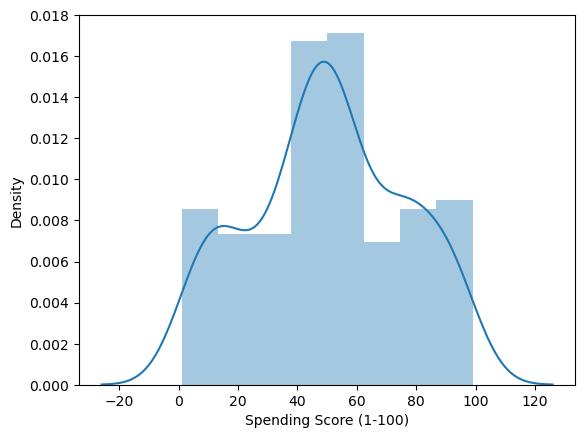

In [8]:
sns.distplot(df['Spending Score (1-100)'])
plt.show()

## Correlation Matrix

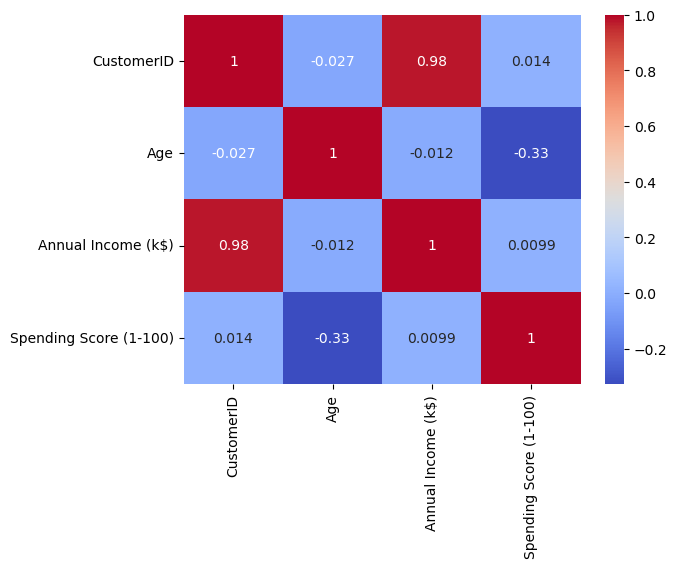

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Clustering

In [10]:
# cluster on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## What is Clustering?

Clustering is an **unsupervised machine learning** technique that groups data points into clusters (segments) based on their similarity.  
- Each row in our dataset = one customer.  
- Features we use = **Annual Income** and **Spending Score**.  
- The algorithm looks for patterns and groups customers with similar behavior together.  

---

## Why Are We Doing Clustering in This Project?

As a shopping mall owner, we want to **understand the different types of customers** we have.  
Since we don’t know the groups beforehand (no labels in the dataset), clustering helps us discover them automatically.

Some possible customer segments:
- **High Income – High Spending** → VIP target customers  
- **High Income – Low Spending** → Potential customers, need engagement  
- **Low Income – High Spending** → Price-sensitive but active customers  
- **Low Income – Low Spending** → Not priority  

---

## Business Value

By identifying these clusters, the mall can:
- Design **different marketing strategies** for each group  
- Give loyalty offers to VIPs  
- Target disengaged wealthy customers with premium campaigns  
- Offer discounts to price-sensitive groups  
- Reduce wasted marketing spend  

In short: **Clustering helps us understand customer behavior and plan smarter marketing strategies.**


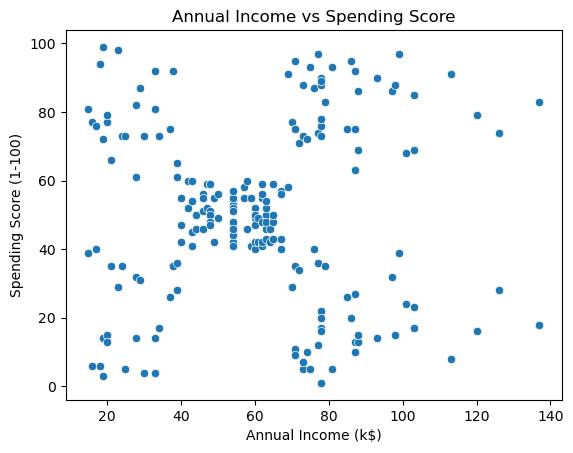

In [11]:
# scatter plot
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=df1)

plt.title("Annual Income vs Spending Score")
plt.show()

## Scatter Plot: Annual Income vs Spending Score

The scatter plot shows the relationship between **Annual Income (k$)** and **Spending Score (1–100)** of mall customers.  

### Observations
- Customers are **spread across the chart**, but some **dense regions (clusters)** are visible.  
- There seem to be groups such as:
  - **High income, low spending** → customers who earn a lot but don’t shop much.  
  - **High income, high spending** → VIP customers who are very valuable.  
  - **Low income, high spending** → price-sensitive but active shoppers.  
  - **Low income, low spending** → least valuable segment.  
- The plot already suggests **natural groupings**, which makes it suitable for clustering with KMeans.  

This visualization helps us see that customers behave differently based on income and spending, and we can use clustering to formally group them.


In [12]:
from sklearn.cluster import KMeans
errors = [] # list to store inertia (error) values
for i in range(1, 11): # trying cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i) # build a Kmeans model with i clusters
    kmeans.fit(df1) # train the model on our data
    errors.append(kmeans.inertia_) # store the total error

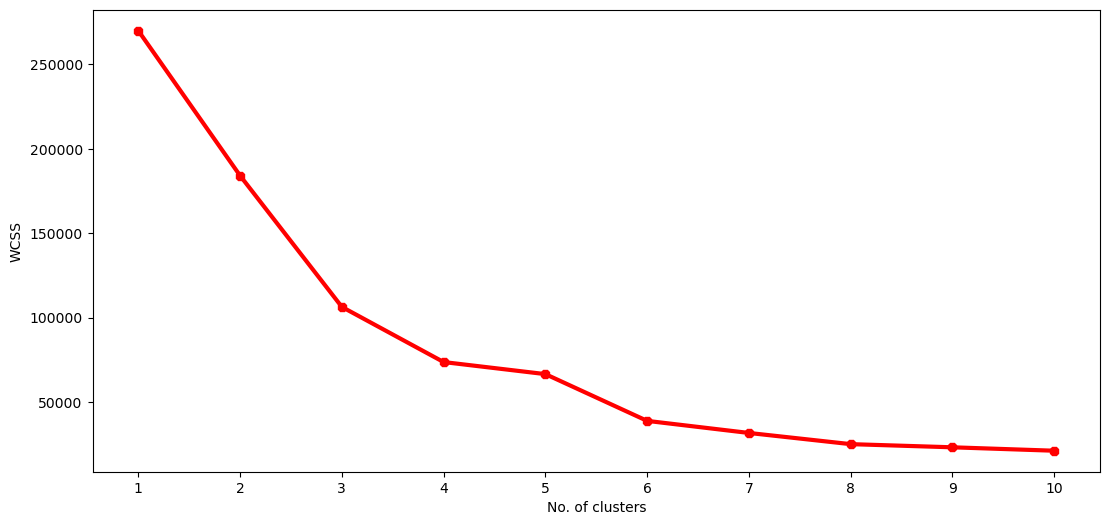

In [13]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

## Elbow Method for Optimal Clusters

The **Elbow Method** helps us decide the best number of clusters (k) for KMeans.  

- On the x-axis: number of clusters (k).  
- On the y-axis: **WCSS (Within-Cluster Sum of Squares)**, also called *inertia*.  
- WCSS measures how tightly grouped the customers are within their cluster (lower = better).  

### Observations
- As k increases, WCSS decreases (clusters fit the data better).  
- However, after a certain point, the improvement becomes very small.  
- The "bend" or **elbow point** in the graph indicates the optimal k.  

From the plot above, the elbow is around **k = 5**.  
This means the data can be meaningfully segmented into **5 distinct customer groups**.  

## What is WCSS?

**WCSS (Within-Cluster Sum of Squares)** measures how close data points are to the centroid of their cluster.  
- Lower WCSS = points are tightly grouped → better clustering.  
- As k increases, WCSS decreases, but after a point the improvement is small.  
- This is why we use the **Elbow Method** to choose the optimal number of clusters.


## KMeans

In [14]:
km = KMeans(n_clusters=5) # creates a KMeans model that will split the data into 5 clusters
km.fit(df1) # runs the KMeans algorithm on our data
y = km.predict(df1) # after fitting, this assigns the each customer in df1 to the nearest cluster
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


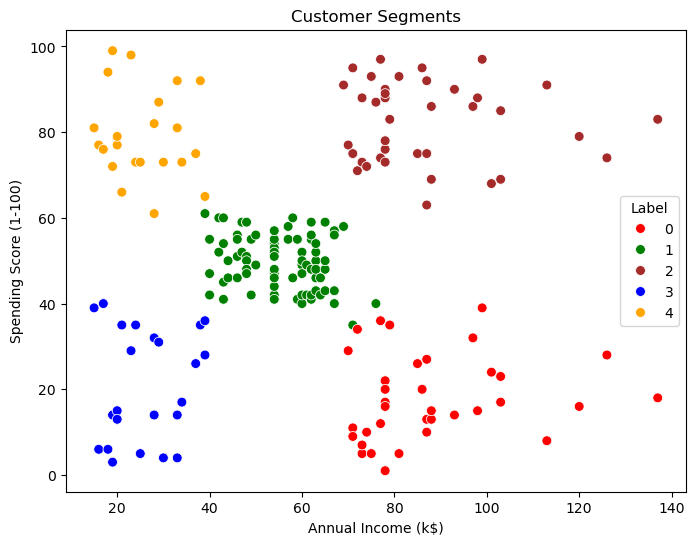

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    data=df1, 
    hue='Label', 
    palette=['red', 'green', 'brown', 'blue', 'orange'], 
    s=50
)
plt.title("Customer Segments")
plt.show()


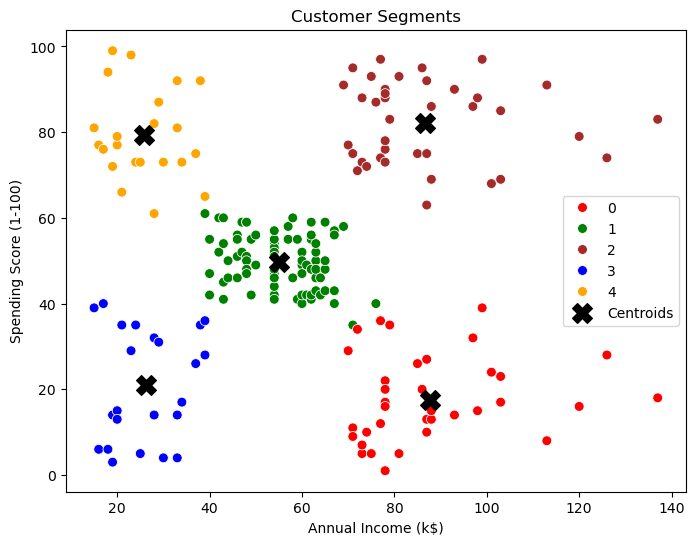

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    data=df1, 
    hue='Label', 
    palette=['red', 'green', 'brown', 'blue', 'orange'], 
    s=50
)

# plot centroids
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], 
            s=200, c='black', marker='X', label='Centroids')

plt.title("Customer Segments")
plt.legend()
plt.show()

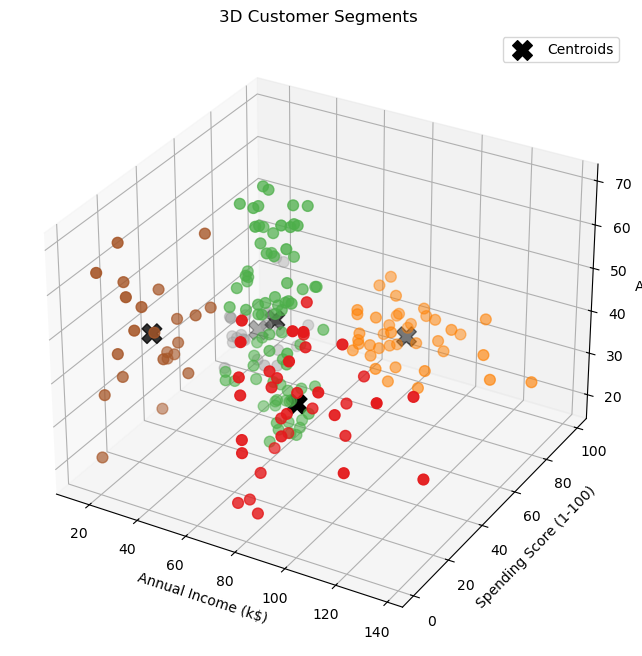

In [19]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# scatter 3D
sc = ax.scatter(
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    df['Age'], 
    c=df1['Label'], 
    cmap='Set1', 
    s=60
)

# centroids (with age dimension set to average age per cluster)
cluster_age = df.groupby(df1['Label'])['Age'].mean().values
ax.scatter(
    centers[:,0], centers[:,1], cluster_age, 
    c='black', marker='X', s=200, label='Centroids'
)

# labels
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title("3D Customer Segments")

plt.legend()
plt.show()
fig.savefig("3d_customer_clusters.png")


## Visualizing Customer Segments

The scatter plots above shows the **5 customer segments** identified by KMeans clustering, based on **Annual Income** and **Spending Score**.  

- Each color represents a different cluster of customers.  
- The **black X markers** represent the **centroids** (cluster centers), which are the "average position" of each group.  

### Cluster Interpretations
- **Cluster 0 (Red):** High Income – Low Spending → wealthy but disengaged customers.  
- **Cluster 1 (Green):** Average Income – Average Spending → mainstream middle-class shoppers.  
- **Cluster 2 (Brown):** High Income – High Spending → VIP customers, best targets for premium offers.  
- **Cluster 3 (Blue):** Low Income – Low Spending → budget-conscious customers, low marketing priority.  
- **Cluster 4 (Orange):** Low Income – High Spending → active spenders despite lower income, price-sensitive but valuable for targeted deals.  

---

This segmentation allows the mall to **personalize marketing strategies** for each group, focus on VIPs, and engage customers more effectively.


# Conclusion & Insights

In this project, we applied **KMeans clustering** to the **Mall Customers dataset** in order to uncover hidden customer segments and provide actionable business insights.